In [198]:
import pandas as pd
import numpy as np
import inspect
import seaborn as sns 
import matplotlib.pyplot as plt
import networkx as nx



#from datetime import timedelta

def list_columns(df):
    for col in df: 
        print(col, end='   ')

def row_count(df):
    return len(df)

pg_1 = 'ggplot'
pg_2 = 'bmh'
pg_3 = 'Solarize_Light2'
pg_4 = 'classic'
pg = pg_4

In [199]:
df1 = pd.read_csv('Shekar-Dataset-1/last_week.csv', index_col=0) 
df2 = pd.read_csv('Shekar-Dataset-1/station_info.csv', index_col=0)

In [200]:
df1.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day
ride_id,,,,,,,,,,,,,
B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,-76.988422,casual,2021-06-25
6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,-77.230681,casual,2021-06-22
7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,-77.035421,member,2021-06-22
18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,2021-06-26
294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,-77.038359,member,2021-06-22


In [201]:
# https://www.semicolonworld.com/question/54955/mapping-columns-from-one-dataframe-to-another-to-create-a-new-column

df1['capacity_start_station'] = df1.start_station_name.map(dict(df2[['Name', 'Capacity']].values))
df1['capacity_end_station'] = df1.end_station_name.map(dict(df2[['Name', 'Capacity']].values))

df1['started_at'] = pd.to_datetime(df1['started_at'], format='%Y-%m-%d %H:%M:%S')# <-- How to change the datetime format to '%d.%m.%Y'| Use in a new line of code: dt.strftime('%m/%d/%Y')
df1['ended_at'] = pd.to_datetime(df1['ended_at'], format='%Y-%m-%d %H:%M:%S')
#df1['day'] = pd.to_datetime(df1['day'], format='%Y-%m-%d')

df1['start_hour'] = df1['started_at'].dt.hour
df1['end_hour'] = df1['started_at'].dt.hour

df1['rental_duration'] = df1['ended_at']-df1['started_at']
df1['rental_duration__minutes'] = df1['rental_duration'].dt.seconds//60

df1['route_id'] = df1['start_station_id'].astype(str) + df1['end_station_id'].astype(str)
df1['route_name'] = df1['start_station_name'].astype(str) + ' <-> ' + df1['end_station_name'].astype(str)
df1['combined_capacity'] = df1['capacity_start_station']*df1['capacity_end_station']

df1['route_weight_normalized'] = df1['route_name'].map(df1["route_name"].value_counts(normalize=True)) 
df1['route_weight'] = df1['route_name'].map(df1["route_name"].value_counts(normalize=False)) 





In [202]:
# List missing values

total = df1.isnull().sum().sort_values(ascending=False)
percent_1 = df1.isnull().sum()/df1.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
combined_capacity,7565,13.1
capacity_end_station,5555,9.6
end_station_name,5422,9.4
end_station_id,5422,9.4
capacity_start_station,5150,8.9


In [203]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57934 entries, B3FA23181ADC06FE to 56B80D92A24B8C93
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   rideable_type             57934 non-null  object         
 1   started_at                57934 non-null  datetime64[ns] 
 2   ended_at                  57934 non-null  datetime64[ns] 
 3   start_station_name        52943 non-null  object         
 4   start_station_id          52943 non-null  float64        
 5   end_station_name          52512 non-null  object         
 6   end_station_id            52512 non-null  float64        
 7   start_lat                 57934 non-null  float64        
 8   start_lng                 57934 non-null  float64        
 9   end_lat                   57848 non-null  float64        
 10  end_lng                   57848 non-null  float64        
 11  member_casual             57934 non-null  obje

In [204]:
# Here we drop all incomplete values
df1_raw = df1
df1 = df1.dropna()


In [205]:
print('Attention!',((row_count(df1_raw)-row_count(df1))/row_count(df1_raw))*100,'% of the inital data has been droped due to missing values!')

Attention! 13.057962509062035 % of the inital data has been droped due to missing values!


In [206]:
df = df1 # Chage to use raw data.

In [207]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,capacity_end_station,start_hour,end_hour,rental_duration,rental_duration__minutes,route_id,route_name,combined_capacity,route_weight_normalized,route_weight
ride_id,,,,,,,,,,,,,,,,,,,,,
B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,...,15.0,0,0,0 days 00:59:47,59,32035.032061.0,Georgia Ave & Spring St <-> New Hampshire & Ki...,165.0,0.000017,1
6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,...,11.0,6,6,0 days 00:04:56,4,32235.032234.0,Merrifield Cinema & Merrifield Town Center <->...,121.0,0.000017,1
7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,...,23.0,22,22,0 days 00:03:11,3,31296.031103.0,Columbia & Ontario Rd NW <-> 15th & Harvard St NW,529.0,0.000138,8
18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,...,15.0,20,20,0 days 01:54:32,114,31638.031638.0,1st & H St NW <-> 1st & H St NW,225.0,0.000224,13
294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,...,19.0,20,20,0 days 00:09:46,9,31600.031267.0,5th & K St NW <-> 17th St & Massachusetts Ave NW,361.0,0.000035,2


### Targeting Road Map

Station | Depature Counts | Arrival Counts

1. Get departure & arrival counts. (Trips per station)
2. Number of trips / station pair (route)
3. Percentage of trips / member type / route.
4. Percentage of trips / bike type.
5. Plot trips / station / day
6. Plot trips / station / member
7. Plot trips / member / day
8. Create a flow map for all stations to get a better understanding of the bike circulation. 

1 & 5 maybe combined

### 1 Departure & Arrival Counts

This still needs some work since it represent the statistic for the whole week. (The could have been an event that lead to an unsual high demand) --> Use groupby('day')....

In [208]:

# Value counts departures
dfd = df.groupby(['start_station_name', 'day']).count()['start_station_id'].reset_index() #df['start_station_name'].value_counts().reset_index() #
dfd.columns  = ['station', 'day', 'count_departure']

# Value counts arrivals
dfa = df.groupby(['end_station_name', 'day']).count()['start_station_id'].reset_index() #df['end_station_name'].value_counts().reset_index() #
dfa.columns  = ['station', 'day', 'count_arrival']

# Meging departue and arrival counts
df_dep_arr = pd.merge(dfa, dfd, how='outer').sort_values(by=['count_arrival', 'count_departure'], ascending=False)

# Lets drop incomplete station pairs
df_dep_arr = df_dep_arr.dropna()

df_dep_arr


,station,day,count_arrival,count_departure
1875,Jefferson Dr & 14th St SW,2021-06-26,213.0,221.0
2009,Lincoln Memorial,2021-06-26,178.0,190.0
2705,Smithsonian-National Mall / Jefferson Dr & 12t...,2021-06-26,159.0,179.0
1848,Henry Bacon Dr & Lincoln Memorial Circle NW,2021-06-26,153.0,151.0
2008,Lincoln Memorial,2021-06-25,143.0,140.0
...,...,...,...,...
2984,White Oak Transit Center,2021-06-23,1.0,1.0
2985,White Oak Transit Center,2021-06-25,1.0,1.0
2990,Wiehle Ave & Reston Station Blvd,2021-06-26,1.0,1.0
2991,Wilson Blvd & N Edgewood St,2021-06-21,1.0,1.0


In [209]:
data1 = pd.melt(df_dep_arr.head(100), id_vars=['station', 'day'], value_vars=['count_arrival', 'count_departure'])

In [210]:
data1.head(200)

,station,day,variable,value
0,Jefferson Dr & 14th St SW,2021-06-26,count_arrival,213.0
1,Lincoln Memorial,2021-06-26,count_arrival,178.0
2,Smithsonian-National Mall / Jefferson Dr & 12t...,2021-06-26,count_arrival,159.0
3,Henry Bacon Dr & Lincoln Memorial Circle NW,2021-06-26,count_arrival,153.0
4,Lincoln Memorial,2021-06-25,count_arrival,143.0
...,...,...,...,...
195,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,2021-06-26,count_departure,66.0
196,15th St & Pennsylvania Ave NW,2021-06-26,count_departure,64.0
197,4th & M St SW,2021-06-23,count_departure,51.0
198,14th & V St NW,2021-06-24,count_departure,69.0


### 1.1 Analyze departures & arrivals

In [211]:
data1.loc[data1['station']=='4th St & Madison Dr NW']

,station,day,variable,value
6,4th St & Madison Dr NW,2021-06-26,count_arrival,138.0
7,4th St & Madison Dr NW,2021-06-24,count_arrival,132.0
8,4th St & Madison Dr NW,2021-06-23,count_arrival,127.0
34,4th St & Madison Dr NW,2021-06-25,count_arrival,94.0
52,4th St & Madison Dr NW,2021-06-21,count_arrival,80.0
106,4th St & Madison Dr NW,2021-06-26,count_departure,130.0
107,4th St & Madison Dr NW,2021-06-24,count_departure,130.0
108,4th St & Madison Dr NW,2021-06-23,count_departure,130.0
134,4th St & Madison Dr NW,2021-06-25,count_departure,96.0
152,4th St & Madison Dr NW,2021-06-21,count_departure,86.0


<AxesSubplot:xlabel='day', ylabel='value'>

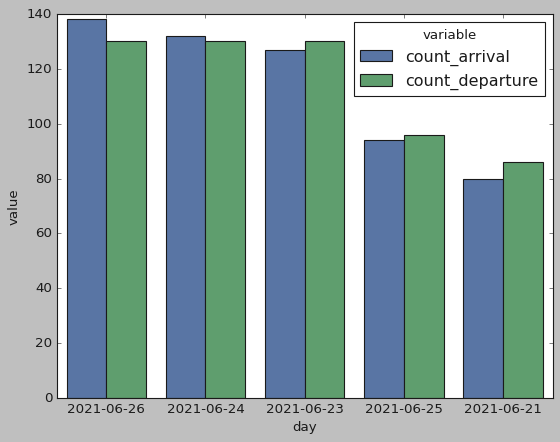

In [212]:
# Using the melt function to reshape the 10 most used staions.
#data = pd.melt(df_dep_arr.head(10), id_vars=['station'], value_vars=['count_arrival', 'count_departure'])
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg)
#plt.xlim(300, 750)
sns.barplot(y='value', x='day', hue='variable', data=data1.loc[data1['station']=='4th St & Madison Dr NW'])

In [213]:
data1

,station,day,variable,value
0,Jefferson Dr & 14th St SW,2021-06-26,count_arrival,213.0
1,Lincoln Memorial,2021-06-26,count_arrival,178.0
2,Smithsonian-National Mall / Jefferson Dr & 12t...,2021-06-26,count_arrival,159.0
3,Henry Bacon Dr & Lincoln Memorial Circle NW,2021-06-26,count_arrival,153.0
4,Lincoln Memorial,2021-06-25,count_arrival,143.0
...,...,...,...,...
195,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,2021-06-26,count_departure,66.0
196,15th St & Pennsylvania Ave NW,2021-06-26,count_departure,64.0
197,4th & M St SW,2021-06-23,count_departure,51.0
198,14th & V St NW,2021-06-24,count_departure,69.0


In [214]:
# Depature Arrival plots of all stations.

#g = sns.FacetGrid(data1, col="station", row="day")

#g.map_dataframe(sns.barplot, x="day", y="value", hue="variable")

1.2 Oversuplliend and Undersupllied Stations

In [215]:
# Find undesupplied stations

data2 = df_dep_arr
data2['deviation_count'] = data2['count_arrival'] - data2['count_departure']
data2 = data2.loc[(data2.deviation_count < - 0)].sort_values(by=['deviation_count'], ascending=True)

data2.head()

,station,day,count_arrival,count_departure,deviation_count
1331,Columbia & Ontario Rd NW,2021-06-26,40.0,72.0,-32.0
2792,Thomas Circle,2021-06-23,56.0,83.0,-27.0
779,39th & Calvert St NW / Stoddert,2021-06-23,15.0,39.0,-24.0
293,15th & Euclid St NW,2021-06-22,24.0,48.0,-24.0
1328,Columbia & Ontario Rd NW,2021-06-23,37.0,60.0,-23.0


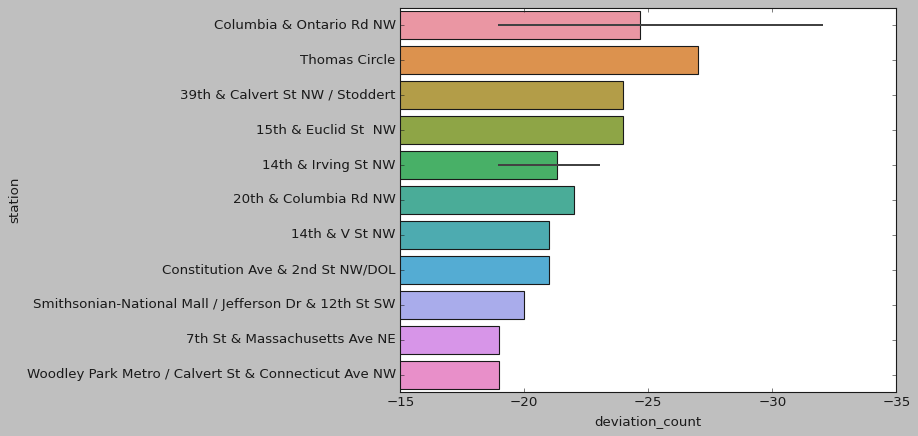

In [216]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg)
plt.xlim(-35, -15)
sns.barplot(y='station', x='deviation_count',data=data2.head(15)).invert_xaxis()

In [217]:
# Find oversupplied stations 

data2 = df_dep_arr
data2['deviation_count'] = data2['count_arrival'] - data2['count_departure']
data2 = data2.loc[(data2.deviation_count > 20)].sort_values(by=['deviation_count'], ascending=False)

data2.head()

,station,day,count_arrival,count_departure,deviation_count
2109,Massachusetts Ave & Dupont Circle NW,2021-06-24,105.0,71.0,34.0
2125,Metro Center / 12th & G St NW,2021-06-23,62.0,30.0,32.0
1382,Columbus Circle / Union Station,2021-06-24,108.0,79.0,29.0
866,4th & C St SW,2021-06-26,72.0,43.0,29.0
824,3rd & M St NE,2021-06-26,113.0,86.0,27.0


<AxesSubplot:xlabel='deviation_count', ylabel='station'>

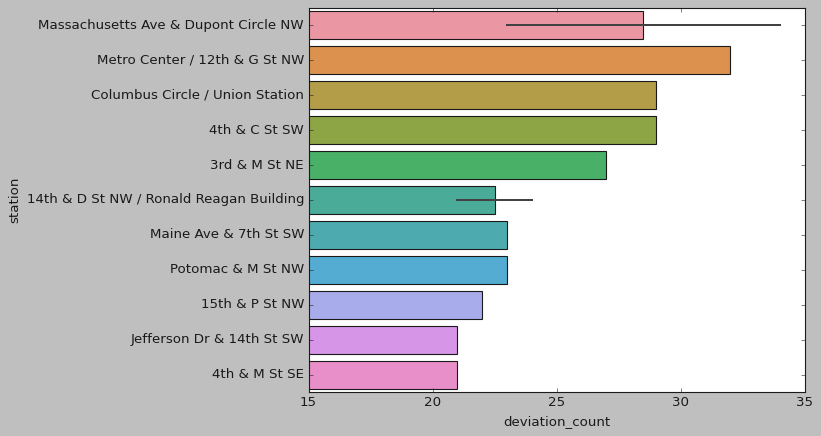

In [218]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg)
plt.xlim(15, 35)
sns.barplot(y='station', x='deviation_count',data=data2.head(15))#.invert_xaxis()

### 2. Number of trips / station pair (route)



In [219]:
list_columns(df)

rideable_type   started_at   ended_at   start_station_name   start_station_id   end_station_name   end_station_id   start_lat   start_lng   end_lat   end_lng   member_casual   day   capacity_start_station   capacity_end_station   start_hour   end_hour   rental_duration   rental_duration__minutes   route_id   route_name   combined_capacity   route_weight_normalized   route_weight   

In [220]:
data3 = df['route_name'].value_counts().reset_index()
data3.columns = ['routes', 'value_counts']
route_weight = data3 # Important for further features

data3.head()

,routes,value_counts
0,Jefferson Dr & 14th St SW <-> Jefferson Dr & 1...,170
1,Smithsonian-National Mall / Jefferson Dr & 12t...,128
2,Lincoln Memorial <-> Lincoln Memorial,90
3,4th St & Madison Dr NW <-> 4th St & Madison Dr NW,87
4,17th St & Independence Ave SW <-> 17th St & In...,80


In [221]:
data3.shape

(21200, 2)

<AxesSubplot:xlabel='value_counts', ylabel='routes'>

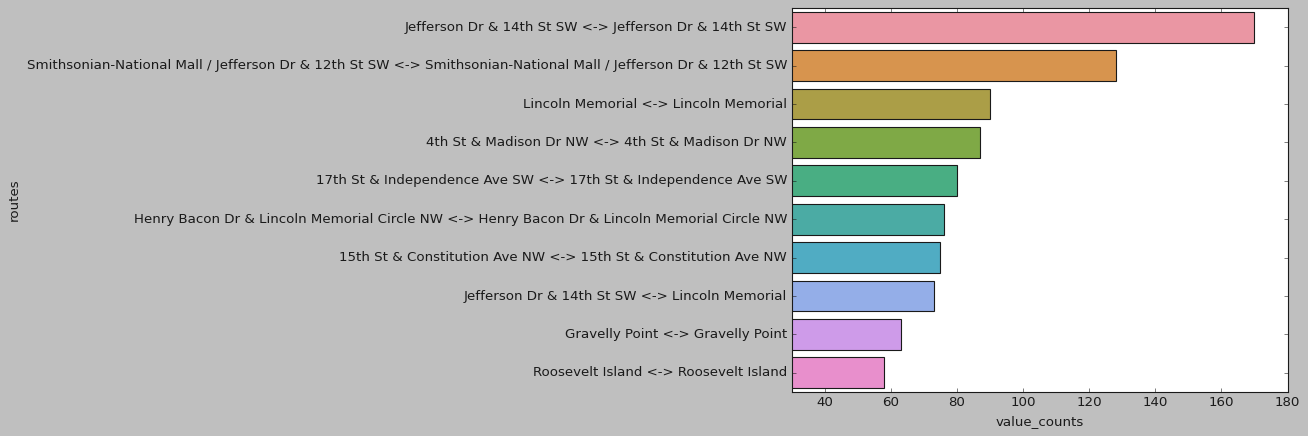

In [222]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg)
plt.xlim(30, 180)
sns.barplot(y='routes', x='value_counts', data=data3.head(10))

### 2.1 Bike Flow Visualization

In [223]:
df.nunique()

rideable_type                   3
started_at                  46534
ended_at                    46483
start_station_name            604
start_station_id              604
end_station_name              597
end_station_id                597
start_lat                    5346
start_lng                    5355
end_lat                      5360
end_lng                      5369
member_casual                   2
day                             6
capacity_start_station         21
capacity_end_station           21
start_hour                     24
end_hour                       24
rental_duration              5609
rental_duration__minutes      350
route_id                    21200
route_name                  21200
combined_capacity             158
route_weight_normalized        55
route_weight                   55
dtype: int64

In [240]:
data4 = df
# Here we are adding the importance of a route as route_weight to the data set
data4['route_weight'] = df['route_name'].map(df["route_name"].value_counts(normalize=True)) 
# this does the same as above # df['route_weight'] = df.groupby(['route_name'])['route_name'].transform('count')


C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [237]:
# Build your graph. Note that we use the DiGraph function to create the graph!
# https://www.python-graph-gallery.com/323-directed-or-undirected-network
G=nx.from_pandas_edgelist(data4.head(20), 'start_station_name', 'end_station_name', create_using=nx.DiGraph(), )

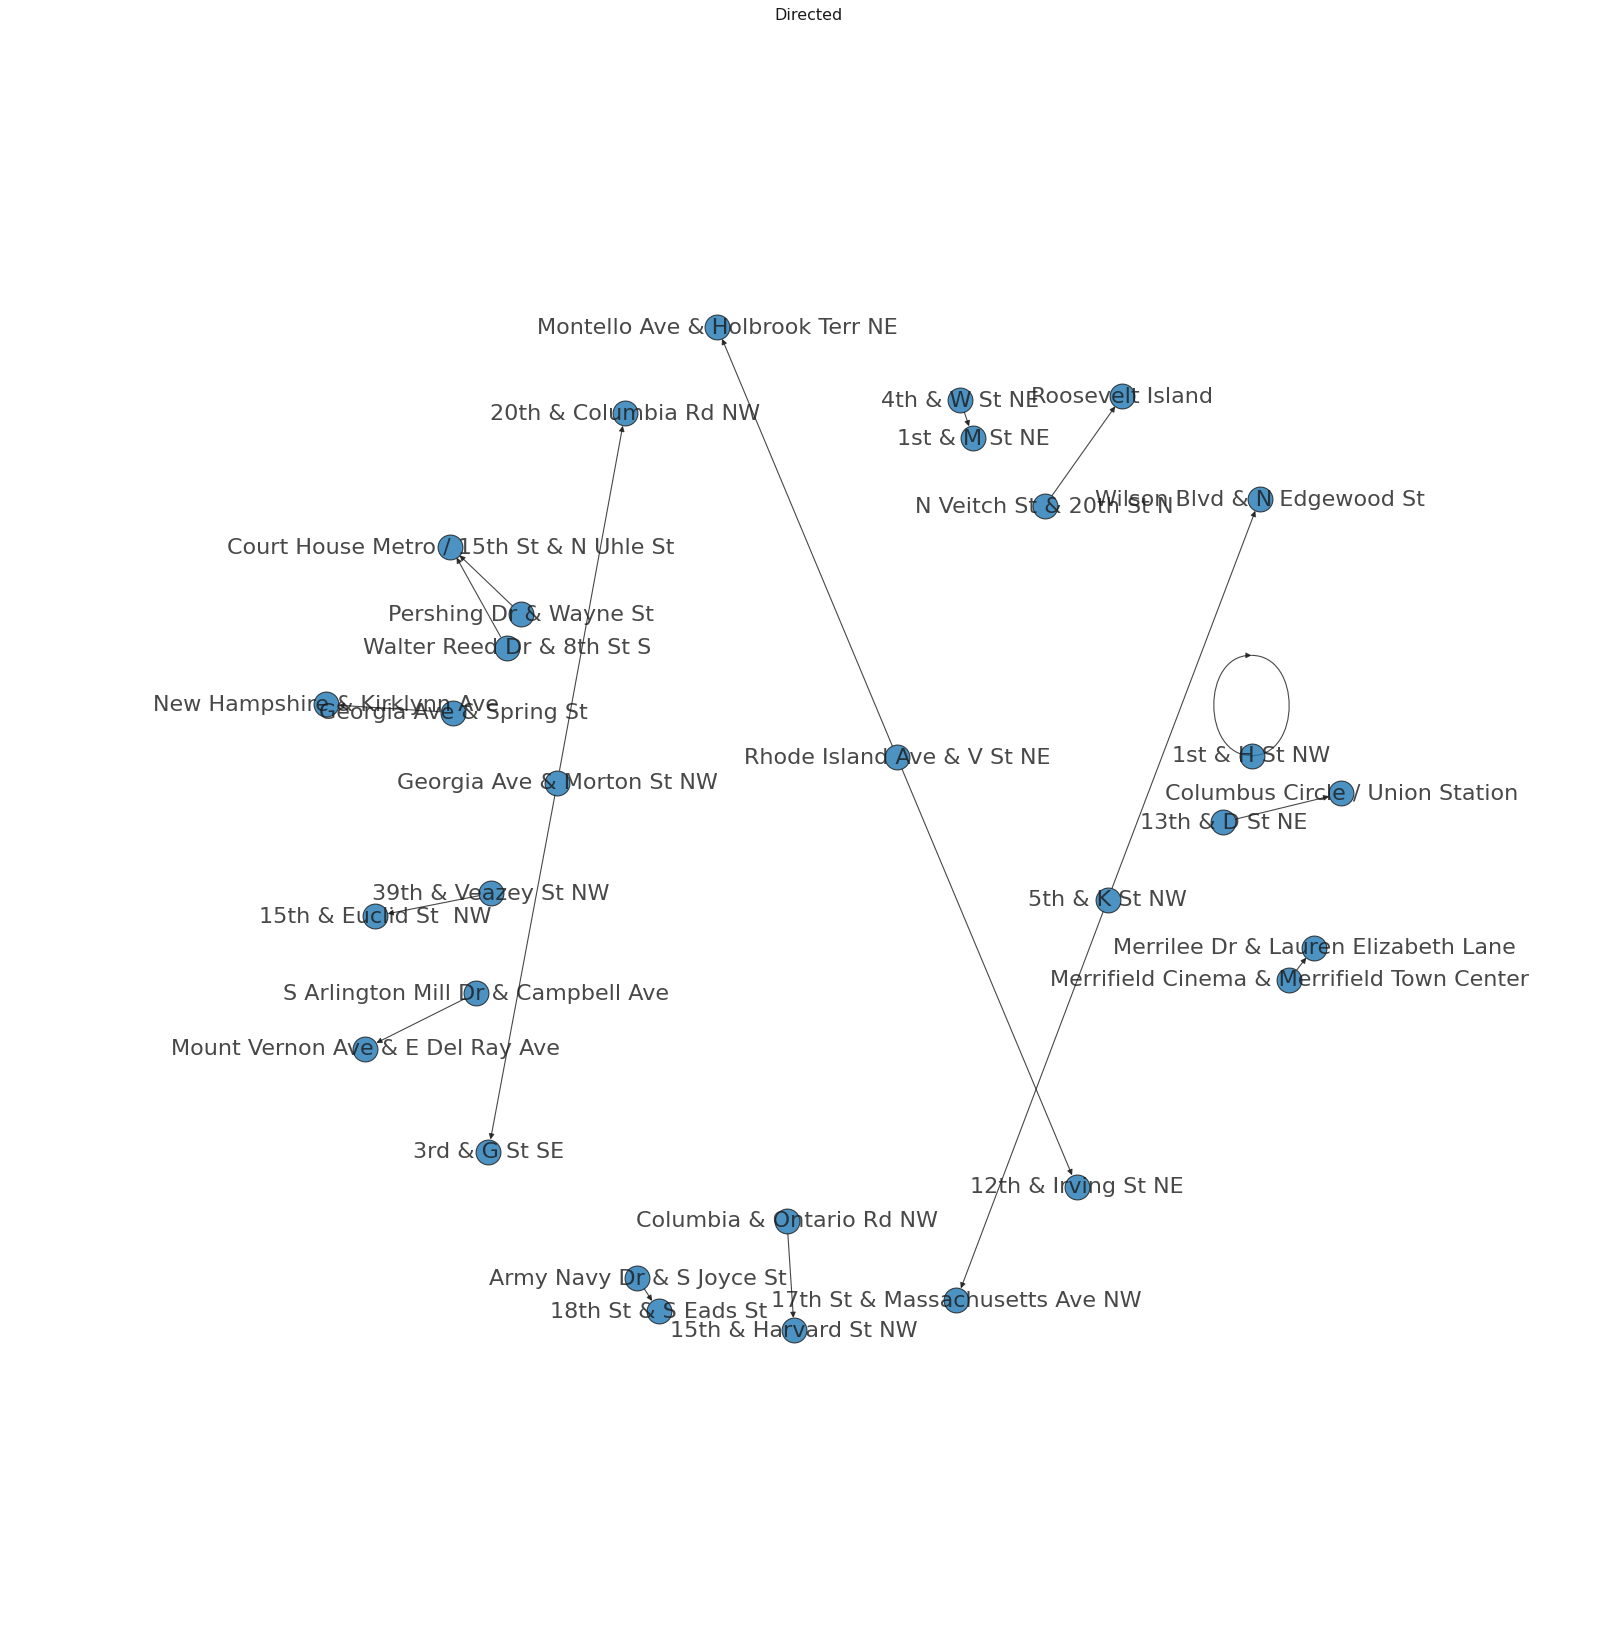

In [242]:
# Make the graph
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, font_size=20, node_size=500, alpha=0.8, arrows=True, pos=nx.spring_layout(G))
plt.title("Directed")
plt.show()

In [227]:
list_columns(df)

rideable_type   started_at   ended_at   start_station_name   start_station_id   end_station_name   end_station_id   start_lat   start_lng   end_lat   end_lng   member_casual   day   capacity_start_station   capacity_end_station   start_hour   end_hour   rental_duration   rental_duration__minutes   route_id   route_name   combined_capacity   route_weight_normalized   route_weight   

In [228]:
list_columns(route_weight)

routes   value_counts   

In [229]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,capacity_end_station,start_hour,end_hour,rental_duration,rental_duration__minutes,route_id,route_name,combined_capacity,route_weight_normalized,route_weight
ride_id,,,,,,,,,,,,,,,,,,,,,
B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,...,15.0,0,0,0 days 00:59:47,59,32035.032061.0,Georgia Ave & Spring St <-> New Hampshire & Ki...,165.0,0.000017,0.000020
6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,...,11.0,6,6,0 days 00:04:56,4,32235.032234.0,Merrifield Cinema & Merrifield Town Center <->...,121.0,0.000017,0.000020
7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,...,23.0,22,22,0 days 00:03:11,3,31296.031103.0,Columbia & Ontario Rd NW <-> 15th & Harvard St NW,529.0,0.000138,0.000159
18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,...,15.0,20,20,0 days 01:54:32,114,31638.031638.0,1st & H St NW <-> 1st & H St NW,225.0,0.000224,0.000258
294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,...,19.0,20,20,0 days 00:09:46,9,31600.031267.0,5th & K St NW <-> 17th St & Massachusetts Ave NW,361.0,0.000035,0.000040


In [230]:
df_dep_arr.head()

,station,day,count_arrival,count_departure,deviation_count
1875,Jefferson Dr & 14th St SW,2021-06-26,213.0,221.0,-8.0
2009,Lincoln Memorial,2021-06-26,178.0,190.0,-12.0
2705,Smithsonian-National Mall / Jefferson Dr & 12t...,2021-06-26,159.0,179.0,-20.0
1848,Henry Bacon Dr & Lincoln Memorial Circle NW,2021-06-26,153.0,151.0,2.0
2008,Lincoln Memorial,2021-06-25,143.0,140.0,3.0


In [231]:
data5 = df_dep_arr

data5

,station,day,count_arrival,count_departure,deviation_count
1875,Jefferson Dr & 14th St SW,2021-06-26,213.0,221.0,-8.0
2009,Lincoln Memorial,2021-06-26,178.0,190.0,-12.0
2705,Smithsonian-National Mall / Jefferson Dr & 12t...,2021-06-26,159.0,179.0,-20.0
1848,Henry Bacon Dr & Lincoln Memorial Circle NW,2021-06-26,153.0,151.0,2.0
2008,Lincoln Memorial,2021-06-25,143.0,140.0,3.0
...,...,...,...,...,...
2984,White Oak Transit Center,2021-06-23,1.0,1.0,0.0
2985,White Oak Transit Center,2021-06-25,1.0,1.0,0.0
2990,Wiehle Ave & Reston Station Blvd,2021-06-26,1.0,1.0,0.0
2991,Wilson Blvd & N Edgewood St,2021-06-21,1.0,1.0,0.0


### 3. Percentage of trips per member type

In [232]:
data = df['member_casual'].value_counts().reset_index()
data.columns = ['member_typ', 'value_counts']
data['%'] = data['value_counts'].sum()
data.head()


,member_typ,value_counts,%
0,member,28234,50369
1,casual,22135,50369


<AxesSubplot:xlabel='member_typ', ylabel='value_counts'>

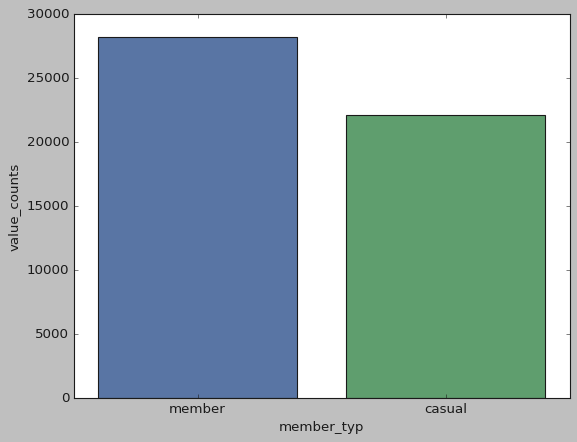

In [233]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg_4)
#plt.ylim(20000, 30000)
sns.barplot(x='member_typ', y='value_counts', data=data)

In [245]:
df.to_csv("last_week_mod.csv")
